# Task 1

In [1]:
import csv
import json
#Read the ACW Data
with open('acw_user_data.csv') as csv_file:
    csv_reader = csv.reader( csv_file, delimiter=',' )
    for line in csv_reader:
        print (line)

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (Dollar)', 'Retired', 'Yearly Salary (Dollar)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup']
['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe']
['Studio 33K Joel walk', 'Randallborough', 'ME3N

# Task 2


In [2]:
#Getting headers of ACW
with open('acw_user_data.csv') as csv_file:
    headers = []
    csv_reader = csv.reader( csv_file, delimiter=',' )
    for line, row in enumerate(csv_reader):
        if line ==  0:
            headers = row
            print(headers)
            print (type(headers))

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (Dollar)', 'Retired', 'Yearly Salary (Dollar)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
<class 'list'>


In [3]:
#Converting flat structure to nested structure
def process_row(row):
    nested_record = {
        "first_name": row['First Name'],
        "last_name": row['Last Name'],
        "marital_status": row['Marital Status'],
        "age": int(row['Age (Years)']),
        "distance_commuted_km": float(row['Distance Commuted to Work (Km)']),
        "employer_company": row['Employer Company'],
        "dependants": int(row['Dependants']) if row['Dependants'] else 0,
        "yearly_pension_dollars": int(row['Yearly Pension (Dollar)']),
        "retired": row['Retired'],
        "yearly_salary_dollars": int(row['Yearly Salary (Dollar)']),
        "sex": row['Sex'],
        "vehicle": {
            "make": row['Vehicle Make'],
            "model": row['Vehicle Model'],
            "year": int(row['Vehicle Year']),
            "type": row['Vehicle Type']
        },
        "credit_card": {
            "start_date": row['Credit Card Start Date'],
            "end_date": row['Credit Card Expiry Date'],
            "number": row['Credit Card Number'],
            "security_code": int(row['Credit Card CVV']),
            "iban": row['Bank IBAN']
        },
        "address": {
            "street": row['Address Street'],
            "city": row['Address City'],
            "postcode": row['Address Postcode']
        }
    }
    return nested_record
    
    
nested_data = []

with open('acw_user_data.csv') as csv_file:
    csv_reader = csv.DictReader( csv_file, delimiter=',' )
    for index,row in enumerate(csv_reader):
        nested_data.append(process_row(row))
        
print( nested_data)

with open('acw_user_data.json', mode='w') as file:
    json.dump( 'acw_user_data', file )  


[{'first_name': 'Kieran', 'last_name': 'Wilson', 'marital_status': 'married or civil partner', 'age': 89, 'distance_commuted_km': 0.0, 'employer_company': 'N/A', 'dependants': 3, 'yearly_pension_dollars': 7257, 'retired': 'True', 'yearly_salary_dollars': 72838, 'sex': 'Male', 'vehicle': {'make': 'Hyundai', 'model': 'Bonneville', 'year': 2009, 'type': 'Pickup'}, 'credit_card': {'start_date': '08/18', 'end_date': '11/27', 'number': '676373692463', 'security_code': 875, 'iban': 'GB62PQKB71416034141571'}, 'address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}}, {'first_name': 'Jonathan', 'last_name': 'Thomas', 'marital_status': 'married or civil partner', 'age': 46, 'distance_commuted_km': 13.72, 'employer_company': 'Begum-Williams', 'dependants': 1, 'yearly_pension_dollars': 0, 'retired': 'False', 'yearly_salary_dollars': 54016, 'sex': 'Male', 'vehicle': {'make': 'Nissan', 'model': 'ATS', 'year': 1996, 'type': 'Coupe'}, 'credit_card': {'start_date': '08/12', '

# Task 3

In [4]:
#Converting flat structure to nested structure
def process_row(row, index, problematic_rows):
    #Getting empty dependents
    dependants = int(row['Dependants']) if row['Dependants'] else 0
    if dependants == 0 and not row['Dependants']:
        problematic_rows.append(index)
    nested_record = {
        "first_name": row['First Name'],
        "last_name": row['Last Name'],
        "marital_status": row['Marital Status'],
        "age": int(row['Age (Years)']),
        "distance_commuted_km": float(row['Distance Commuted to Work (Km)']),
        "employer_company": row['Employer Company'],
        "dependants": dependants,
        "yearly_pension_dollars": int(row['Yearly Pension (Dollar)']),
        "retired": row['Retired'],
        "yearly_salary_dollars": int(row['Yearly Salary (Dollar)']),
        "sex": row['Sex'],
        "vehicle": {
            "make": row['Vehicle Make'],
            "model": row['Vehicle Model'],
            "year": int(row['Vehicle Year']),
            "type": row['Vehicle Type']
        },
        "credit_card": {
            "start_date": row['Credit Card Start Date'],
            "end_date": row['Credit Card Expiry Date'],
            "number": row['Credit Card Number'],
            "security_code": int(row['Credit Card CVV']),
            "iban": row['Bank IBAN']
        },
        "address": {
            "street": row['Address Street'],
            "city": row['Address City'],
            "postcode": row['Address Postcode']
        }
    }
    return nested_record
    
    
nested_data = []
problematic_rows=[]
with open('acw_user_data.csv') as csv_file:
    csv_reader = csv.DictReader( csv_file, delimiter=',' )
    for index, row in enumerate(csv_reader):
        nested_data.append(process_row(row, index + 1, problematic_rows))
        
#print( nested_data)

with open('acw_user_data.json', mode='w') as file:
    json.dump( 'acw_user_data', file )
    
#Printing Problemetic rows for dependents
print("Problematic rows for dependants:", problematic_rows)



Problematic rows for dependants: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


# Task 4

In [5]:
#Converting flat structure to nested structure
def process_row(row, index, problematic_rows):
    #Getting empty dependents
    dependants = int(row['Dependants']) if row['Dependants'] else 0
    if dependants == 0 and not row['Dependants']:
        problematic_rows.append(index)
        
    nested_record = {
        "first_name": row['First Name'],
        "last_name": row['Last Name'],
        "marital_status": row['Marital Status'],
        "age": int(row['Age (Years)']),
        "distance_commuted_km": float(row['Distance Commuted to Work (Km)']),
        "employer_company": row['Employer Company'],
        "dependants": dependants,
        "yearly_pension_dollars": int(row['Yearly Pension (Dollar)']),
        "retired": row['Retired'],
        "yearly_salary_dollars": int(row['Yearly Salary (Dollar)']),
        "sex": row['Sex'],
        "vehicle": {
            "make": row['Vehicle Make'],
            "model": row['Vehicle Model'],
            "year": int(row['Vehicle Year']),
            "type": row['Vehicle Type']
        },
        "credit_card": {
            "start_date": row['Credit Card Start Date'],
            "end_date": row['Credit Card Expiry Date'],
            "number": row['Credit Card Number'],
            "security_code": int(row['Credit Card CVV']),
            "iban": row['Bank IBAN']
        },
        "address": {
            "street": row['Address Street'],
            "city": row['Address City'],
            "postcode": row['Address Postcode']
        }
    }
    return nested_record
    
    
nested_data = []
problematic_rows=[]
with open('acw_user_data.csv') as csv_file:
    csv_reader = csv.DictReader( csv_file, delimiter=',' )
    for index, row in enumerate(csv_reader):
        nested_data.append(process_row(row, index + 1, problematic_rows))
        
#print( nested_data)

with open('acw_user_data.json', mode='w') as file:
    json.dump( 'acw_user_data', file ) 

#Write all records to a processed.json
with open('processed.json', mode='w') as file:
    json.dump(nested_data, file)
    
#Printing Problemetic rows for dependents
print("Problematic rows for dependants:", problematic_rows)



Problematic rows for dependants: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


# Task 5

In [6]:
#Converting flat structure to nested structure
def process_row(row, index, problematic_rows):
    #Getting empty dependents
    dependants = int(row['Dependants']) if row['Dependants'] else 0
    if dependants == 0 and not row['Dependants']:
        problematic_rows.append(index)
        
    nested_record = {
        "first_name": row['First Name'],
        "last_name": row['Last Name'],
        "marital_status": row['Marital Status'],
        "age": int(row['Age (Years)']),
        "distance_commuted_km": float(row['Distance Commuted to Work (Km)']),
        "employer_company": row['Employer Company'],
        "dependants": dependants,
        "yearly_pension_dollars": int(row['Yearly Pension (Dollar)']),
        "retired": row['Retired'],
        "yearly_salary_dollars": int(row['Yearly Salary (Dollar)']),
        "sex": row['Sex'],
        "vehicle": {
            "make": row['Vehicle Make'],
            "model": row['Vehicle Model'],
            "year": int(row['Vehicle Year']),
            "type": row['Vehicle Type']
        },
        "credit_card": {
            "start_date": row['Credit Card Start Date'],
            "end_date": row['Credit Card Expiry Date'],
            "number": row['Credit Card Number'],
            "security_code": int(row['Credit Card CVV']),
            "iban": row['Bank IBAN']
        },
        "address": {
            "street": row['Address Street'],
            "city": row['Address City'],
            "postcode": row['Address Postcode']
        }
    }
    return nested_record
    
    
nested_data = []
problematic_rows=[]
retired_customers = []
employed_customers = []

with open('acw_user_data.csv') as csv_file:
    csv_reader = csv.DictReader( csv_file, delimiter=',' )
    for index, row in enumerate(csv_reader):
        record = process_row(row, index + 1, problematic_rows)
        nested_data.append(record)

        #check if the person is retired
        if row['Retired'] == 'True':
            retired_customers.append(record)
            
        #check if the person is employed
        if row['Employer Company'] != 'N/A':
            employed_customers.append(record)
            
#print( nested_data)


#Write JSON output for retired customers
with open('retired.json', mode='w') as file:
    json.dump(retired_customers, file)

#write JSON output for Employed customers
with open('employed.json', mode='w') as file:
    json.dump(employed_customers, file)
    

#print(len(retired_customers))
#print(retired_customers)
#print (employed_customers)

Problematic rows for dependants: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


# Task 6

In [44]:
from datetime import datetime

def should_flag_row(row):
    start_date_str = row['Credit Card Start Date']
    end_date_str = row['Credit Card Expiry Date']

    
    start_date = datetime.strptime(start_date_str, "%m/%y")
    end_date = datetime.strptime(end_date_str, "%m/%y")
    # Calculate difference in years and months
    years_diff = end_date.year - start_date.year
    months_diff = end_date.month - start_date.month
    
    # Adjust total year difference if end month is earlier in the year than the start month
    if months_diff < 0:
        years_diff -= 1
    
    # Flag if the difference is greater than 10 years
    return years_diff > 10

    
flagged_entries = []

with open("acw_user_data.csv", 'r') as csvfile:
    reader = csv.DictReader(csvfile)
        
    for row in reader:
        if should_flag_row(row):
            flagged_entries.append(row)

    
# Write flagged entries to the JSON file
with open('remove_ccard.json', 'w') as jsonfile:
    json.dump(flagged_entries, jsonfile)








# Task 7

In [42]:
import json

def calculate_salary_commute(customer):

    salary = customer.get('yearly_salary_dollars', 0)
    commute_km = customer.get('distance_commuted_km', 0)
    
    # Calculate Salary-Commute
    if commute_km > 1:
        return salary / commute_km
    else:
        return salary
    
with open('processed.json', 'r') as file:
    data = json.load(file)
    
    # Update each customer record with 'Salary-Commute' attribute
    for customer in data:
        customer['Salary-Commute'] = calculate_salary_commute(customer)
        index[key]=value

 

In [41]:
#write json file with commute salary
with open('commute.json', 'w') as file:
    json.dump(data, file, indent=4)

# Data Visualisation

# Task 1

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
dataframe = pd.read_csv('acw_user_data.csv')
#Mean Salary
Salary = dataframe['Yearly Salary (Dollar)']
print (f" {Salary.mean()} is Mean of the Salary records " )

#Median Age
Age = dataframe['Age (Years)']
print (f" {Age.median()} is Median of the Age " )


 57814.078 is Mean of the Salary records 
 54.0 is Median of the Age 


# Task 2

# 2.a

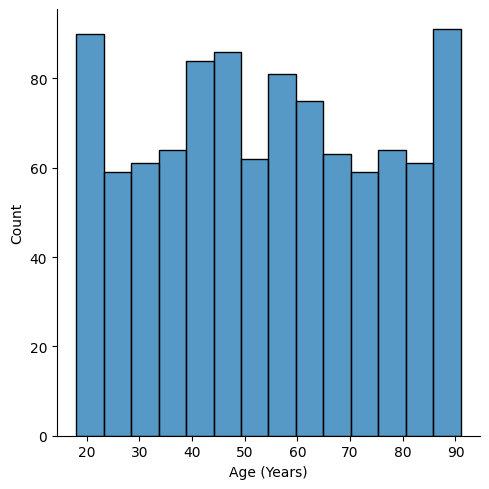

In [9]:
#calculating required bins for bin width 5
bin_width = 5
Age_range = Age.max() - Age.min()
num_of_bins = int(Age_range / bin_width)

#Age_plot
Age_plot = sns.displot(Age, bins=num_of_bins)
plt.show()

# 2.b

In [10]:
#Fixing data errors in Dependents

dataframe['Dependants'].unique()

array([ 3.,  1.,  2.,  4., nan,  5.])

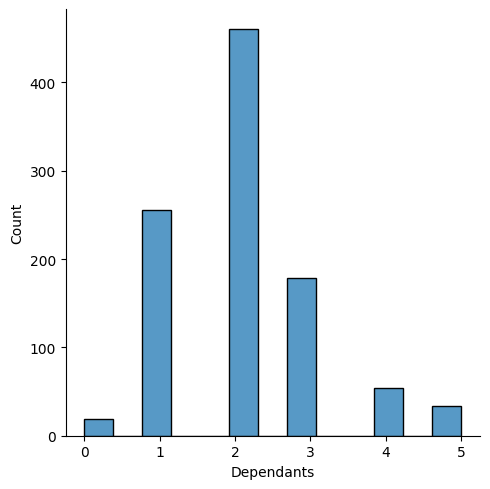

In [11]:
#Convert non-numeric entries to NaN

#Replace nan wiith 0
dataframe['Dependants']=dataframe['Dependants'].fillna(0)
dataframe['Dependants'].unique()

#Dependants plot
Dependants = dataframe['Dependants']
Dependants_plot = sns.displot(Dependants)
plt.show()

# 2.c

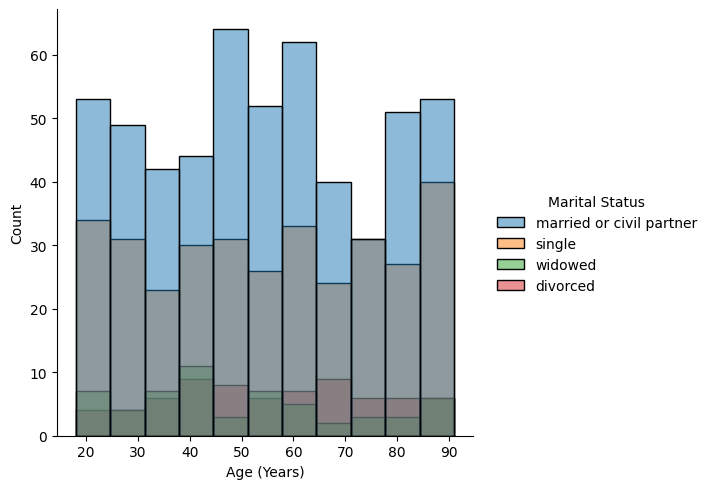

In [12]:
#Age (of default bins), conditioned on Marital Status 
Age_plot2 = sns.displot(data=dataframe, x = 'Age (Years)', hue= 'Marital Status')
plt.show()

# Task 3

# 3.a

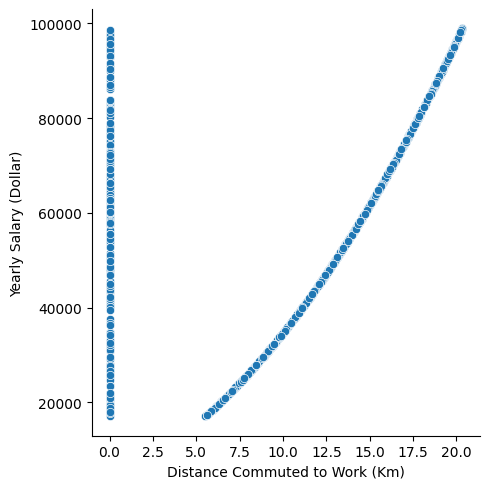

In [13]:
#Multivariate plots
#Commuted distance against salary.
M_plot1 = sns.relplot(data=dataframe, x = 'Distance Commuted to Work (Km)', y = 'Yearly Salary (Dollar)')

# 3.b

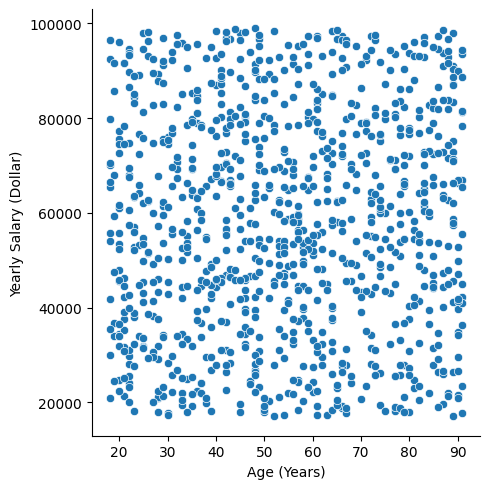

In [14]:
#Age against Salary
M_plot2 = sns.relplot(data=dataframe, x =  'Age (Years)', y = 'Yearly Salary (Dollar)')

# 3.c

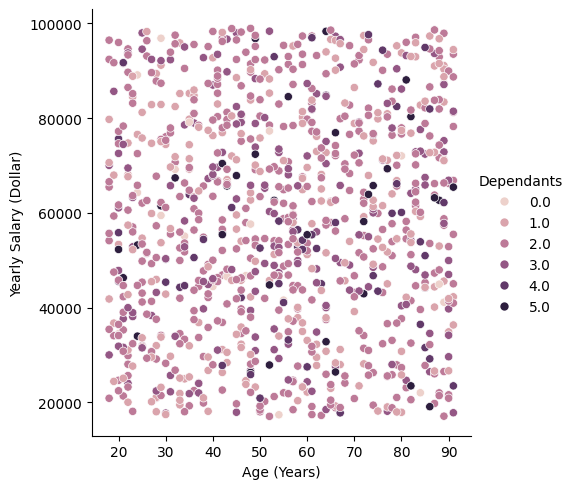

In [15]:
#Age against Salary conditioned by Dependants
M_plot3 = sns.relplot(data=dataframe, x =  'Age (Years)', y = 'Yearly Salary (Dollar)', hue = Dependants)

# Task 4

In [16]:
save_figure = {}
save_figure["./Age_plot.png"]=Age_plot
save_figure["./Dependants_plot.png"]=Dependants_plot
save_figure["./Age_plot2.png"]=Age_plot2
save_figure["./M_plot1.png"]=M_plot1
save_figure["./M_plot2.png"]=M_plot2
save_figure[ "./M_plot3.png"]=M_plot3

for filepath, figureplot in save_figure.items():
   figureplot.savefig(filepath) 